# Data Visualisation

## Matplotlib Architecture

### Backend Layer: Figure Canvas, Renderer, Event

### Artist Layer: Artist object uses the renderer to draw on canvas

In [ ]:
# Histogram: 


Primitive Artist
Composite Artist
Top level matplotlib object is the Figure Artist and most important Axes 

Artist layer is hard, sintacticly heavy! There is also the sSriping layer which is easier and faster to use for analysis

matplotlib.pyplot interface which automaters the process defining a canvas and defining a figure artist instance and connecting them.

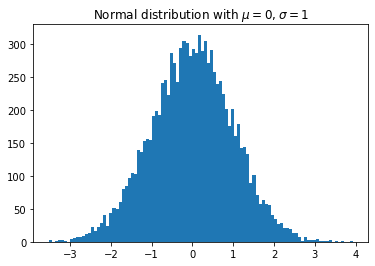

In [4]:
# Histogram: 

import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

# The power of the scripting interface 

In [5]:
import matplotlib.pyplot as plt # draw almost everything just with the plt function

Text(0.5, 1.0, 'bla')

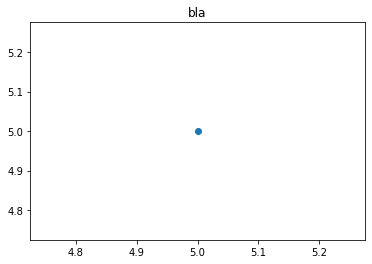

In [13]:
# e.x.1 dot/position mark

# Use magic function to generate plots in the same window 
%matplotlib inline  
# you cannot modify a figure onece it is rendered

plt.plot(5,5, 'o')
plt.title('bla')

In [23]:
# Use the notebook backed in place
%matplotlib notebook 
# in this way you will be able to add stuff to the graph without the need to regenerate the figure.
# it doesn't work
plt.plot(5,5, 'o')

<IPython.core.display.Javascript object>

In [20]:
# Pandas has a built in implementation of matplotlib directly operating from the df object: 
df.plot(kind = 'line')
df['col1'].plot(kind = 'hist')

NameError: name 'df' is not defined

# Let's get some data

In [25]:
import pandas as pd
import numpy as np
from __future__ import print_function

In [32]:
# import dataset immigration to Cadada: 

link = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'
df_canada = pd.read_excel(link, sheet_name = 'Canada by Citizenship', skiprows = range(20), skipfooter = 2)
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [33]:
# Modify a bit the df 
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [34]:
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [35]:
# Put Countries col as index
#df_canada.index = df_canada['Country']
#df_canada.drop(['Country'], axis = 1, inplace = True)

# or directly 
df_canada.set_index('Country', inplace=True)
df_canada.index.name = None


In [56]:
# last collumn with the total immigration in all periods.
df_canada['Total'] = df_canada.iloc[:,3:37].sum(axis=1)
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


# Data selection and filtering

In [37]:
# Filtering data one condition

condition = df_canada['Continent'] == 'Asia'
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [55]:
df_canada[condition]

<ipython-input-55-ce6c2a58db83>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_canada[condition]


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
Lebanon,Asia,Western Asia,Developing regions,1409,1119,1159,789,1253,1683,2576,...,3709,3802,3467,3566,3077,3432,3072,1614,2172,115359
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Iraq,Asia,Western Asia,Developing regions,262,245,260,380,428,231,265,...,2226,1788,2406,3543,5450,5941,6196,4041,4918,69789


In [39]:
# Multiple conditions

# we can pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_canada[(df_canada['Continent']=='Asia') & (df_canada['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [40]:
print('data dimensions:', df_canada.shape)
print(df_canada.columns)
df_canada.head(2)

data dimensions: (195, 38)
Index(['Continent',    'Region',   'DevName',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013,     'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [41]:
# Plotting (lines-ts)

In [42]:
# we are using the inline backend
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [43]:
# Check version
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.2.0


In [44]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 0, 'years')

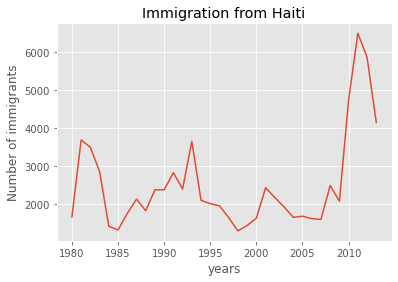

In [45]:
years = list(map(int, range(1980,2014)))

df_canada.loc['Haiti', years].plot(kind = 'line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('years')

In [46]:
haiti = df_canada.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

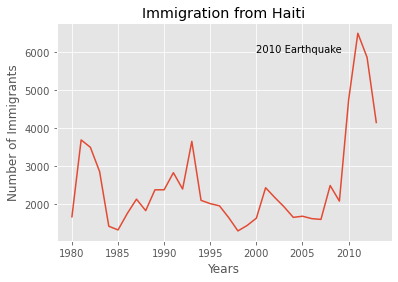

In [47]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

In [48]:
# Select multiple series: 

df_CI = df_canada.loc[['China','India'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


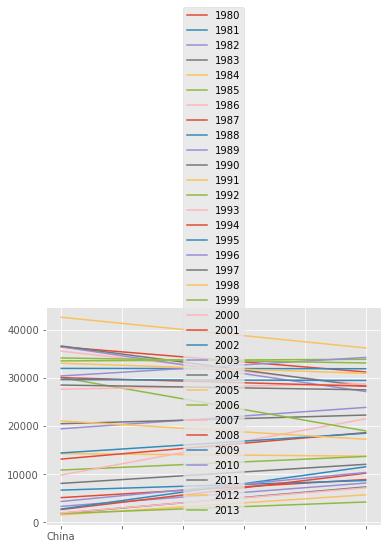

In [49]:
df_CI.plot(kind='line')

In [50]:
# You need to Transpose 

df_CI = df_CI.transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


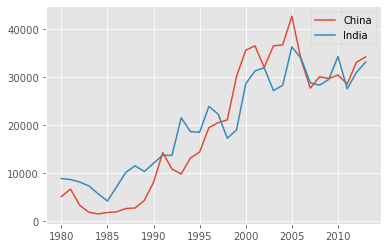

In [51]:
df_CI.plot(kind= 'line')

In [52]:
# Sort df by collumn
df_canada.sort_values(by = 'Total', ascending = False, axis = 0, inplace = True)
# Save this dataframe 

df_canada.to_csv('C://Pydir/First/df_can_cor.csv')

# TOP FIVE

df_top_5 = df_canada.head()
df_top_5 = df_top_5[years].transpose()
df_top_5


,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


Text(0.5, 0, 'Years')

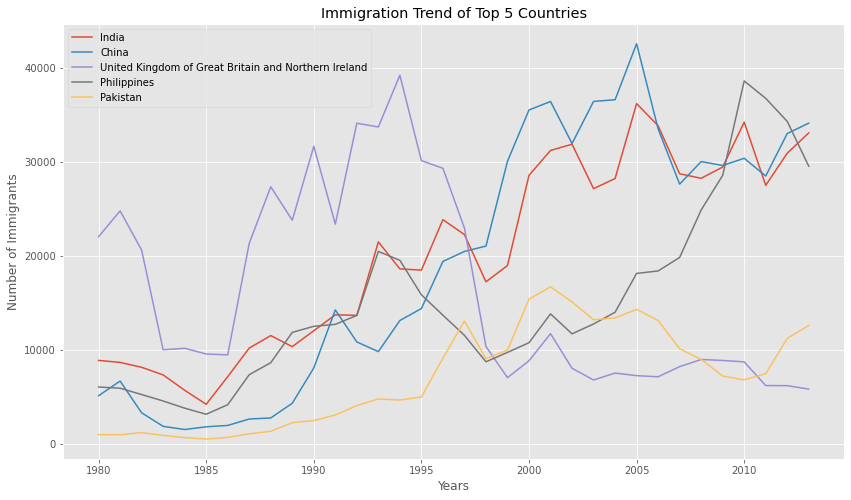

In [53]:
# Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.

df_top_5.index = df_top_5.index.map(int) 
df_top_5.plot(kind='line', figsize=(14, 8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

None


# Visualisation (con't)

## Area Plots

In [1]:
# Modules

import pandas as pd
import numpy as np
import matplotlib as mpl

In [2]:
# Data 

df_canada = pd.read_csv('C://Pydir/First/df_can_cor.csv')
df_canada.set_index('Unnamed: 0', inplace = True)
df_canada.index.name = None
df_canada

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [3]:
# Are all column labels of type string?? 
all(isinstance(column, str) for column in df_canada.columns)

# If not better to change them to string with : 
df_canada.columns = list(map(str, df_canada.columns))

In [4]:
# New dataframe top five

df_topfive = df_canada.head(5)
df_topfive

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [4]:
# Matplot libe plots the indices of a df on the horizontal axis, we need years there, so we have to transpose the df. 

# create a list of years: 

years = list(map(str, range(1980,2014)))

# transpose df taking only the 

df_topfive_trans = df_topfive[years].transpose()

# Change index value of to type integer: 
df_topfive_trans.index.map(int)

# fix name col UK
df_topfive_trans.rename(columns = {'United Kingdom of Great Britain and Northern Ireland' : 'UK'}, inplace = True)
df_topfive_trans.head()

NameError: name 'df_topfive' is not defined

## Plotting using the scripting layer:

In [6]:
import matplotlib.pyplot as plt

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


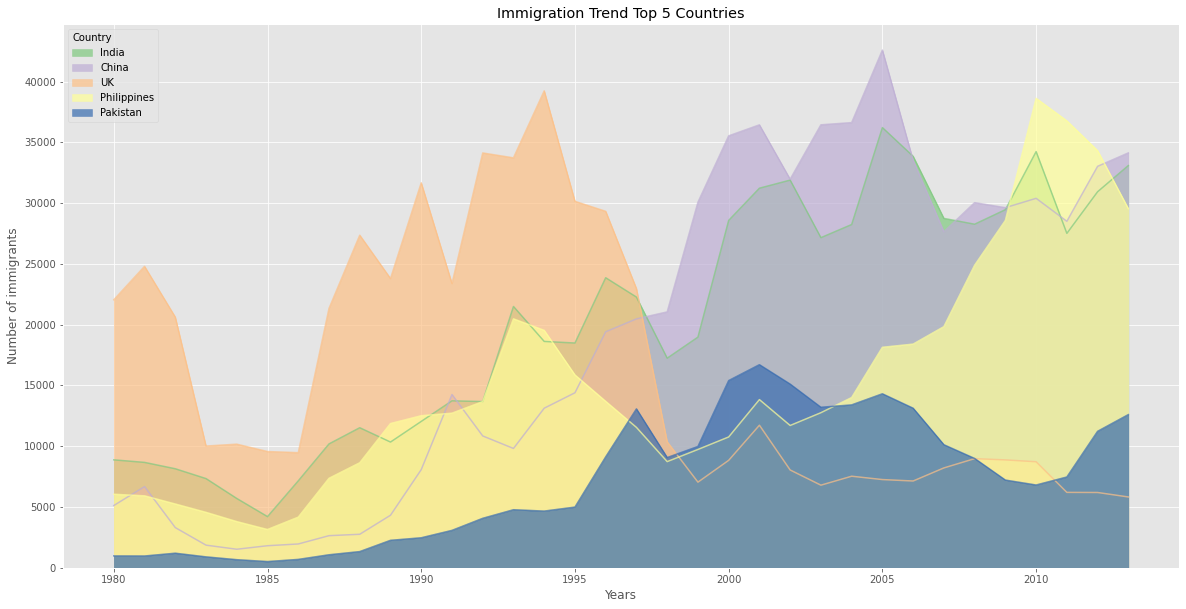

In [7]:
print(plt.style.available)
mpl.style.use(['ggplot'])
col = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0']


df_topfive_trans.plot(kind= 'area', stacked =  False, alpha = 0.7, figsize = (20,10), color = col)
plt.title('Immigration Trend Top 5 Countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend(title = 'Country', loc = 'upper left')._legend_box.align = 'left'

plt.show()




# Option 2: 
## Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred) 
### This way of plotting is more flexible

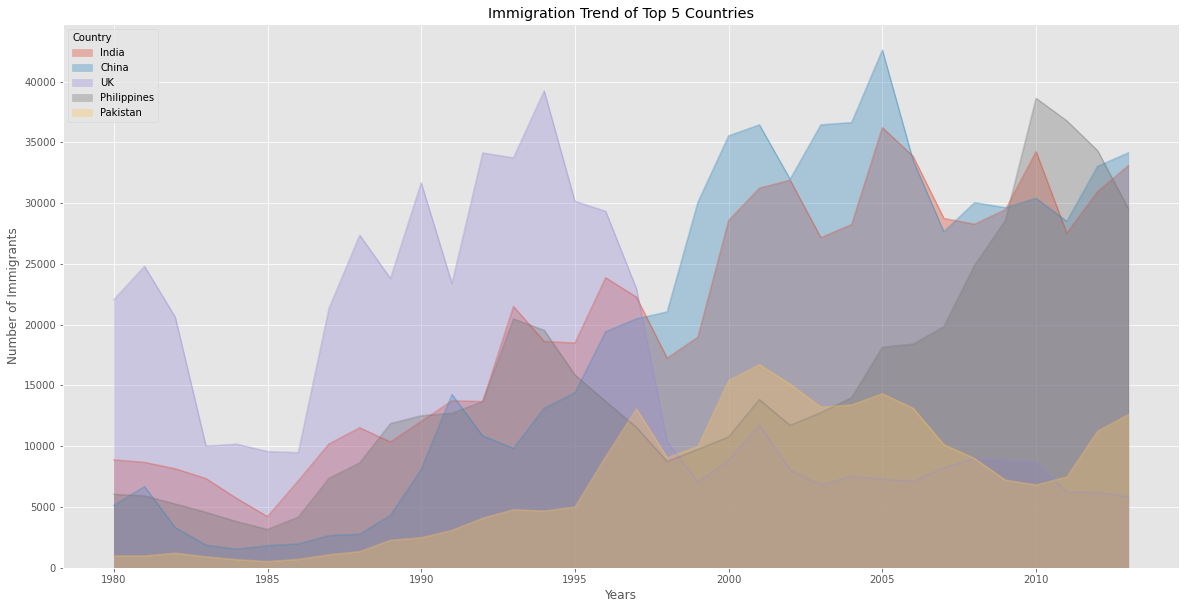

In [8]:
ax = df_topfive_trans.plot(kind='area', stacked = False, alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
leg = ax.legend(title = 'Country', loc = 'upper left')
leg._legend_box.align = 'left' 

# Histograms

In [9]:
# get data from one year: 

df_canada['1993']

India                                                   21496
China                                                    9817
United Kingdom of Great Britain and Northern Ireland    33720
Philippines                                             20479
Pakistan                                                 4777
                                                        ...  
San Marino                                                  0
New Caledonia                                               0
Marshall Islands                                            0
Western Sahara                                              0
Palau                                                       0
Name: 1993, Length: 195, dtype: int64

In [10]:
# Split into intervals (defoult 10 bins) with function .histogram() in numpy

count, bin_edges = np.histogram(df_canada['1993'])

# gives us two objects 

print(count)
print(bin_edges)

[176  12   4   0   0   0   2   0   0   1]
[    0.  3372.  6744. 10116. 13488. 16860. 20232. 23604. 26976. 30348.
 33720.]


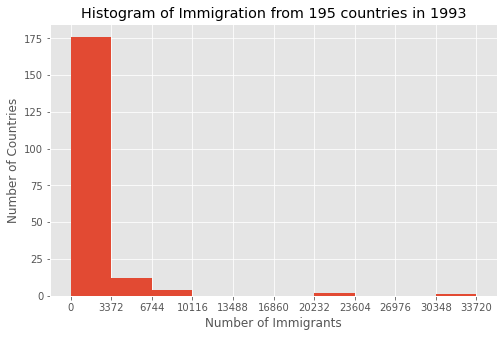

In [11]:
# now lets plot, use bin_edges from np for better understanding : 

df_canada['1993'].plot(kind = 'hist', figsize = (8,5), xticks = bin_edges)
plt.title('Histogram of Immigration from 195 countries in 1993') 
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants') 

plt.show()

In [12]:
# Considering country of origin and every year of the ts
years = list(map(str, range(1980,2014)))

df_NDS = df_canada.loc[['Norway', 'Denmark', 'Sweden'], years].transpose()
df_NDS.head()

,Norway,Denmark,Sweden
1980,116,272,281
1981,77,293,308
1982,106,299,222
1983,51,106,176
1984,31,93,128


In [13]:
tot = sum(df_NDS.values)
tot

array([2327, 3901, 5866], dtype=int64)

Text(0.5, 0, 'Number of Immigrants')

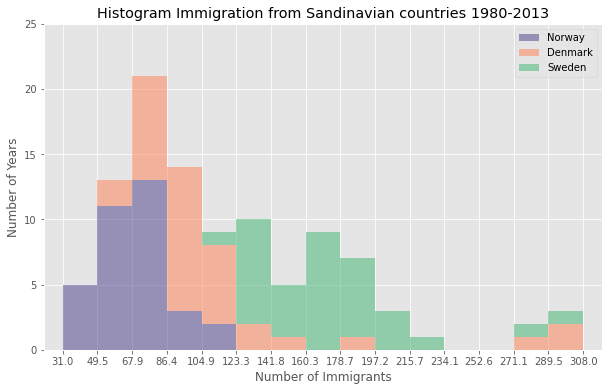

In [14]:
count, bin_edges = np.histogram(df_NDS, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

ax = df_NDS.plot.hist(figsize = (10,6), bins = 15, 
                      xticks = bin_edges, color = ['darkslateblue','coral',  'mediumseagreen'], 
                      alpha = 0.5, stacked=True, xlim=(xmin, xmax), ylim = (0,25)) # stacked = true for no overlapping 

ax.set_title('Histogram Immigration from Sandinavian countries 1980-2013')
ax.set_ylabel('Number of Years')
ax.set_xlabel('Number of Immigrants')


In [16]:
# Check more colors : 
import matplotlib
names =[]
hexval =[]
for name, hex in matplotlib.colors.cnames.items():
    names.append(name)
    hexval.append(hex)

In [54]:
palette = {'colour' : names, 'hex' : hexval}
palette_df = pd.DataFrame(palette)
palette_df[palette_df['colour'].str.contains('dark')].head()

,colour,hex
21,darkblue,#00008B
22,darkcyan,#008B8B
23,darkgoldenrod,#B8860B
24,darkgray,#A9A9A9
25,darkgreen,#006400


# Bar Chart

In [65]:
df_iceland = df_canada.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

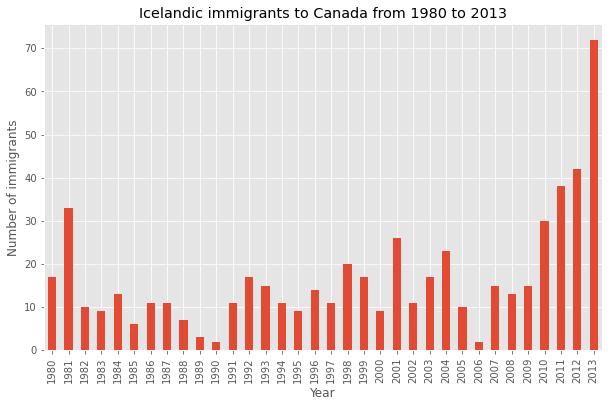

In [66]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

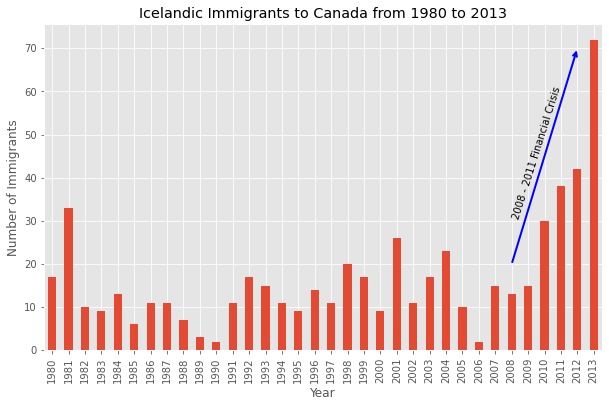

In [69]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

In [84]:
# Horizontal: 
df_canada.sort_values(['Total'], ascending=False, axis = 0, inplace=True)
df_top15 = df_canada['Total'].head(15)
df_top15

India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

Text(0.5, 1.0, 'Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

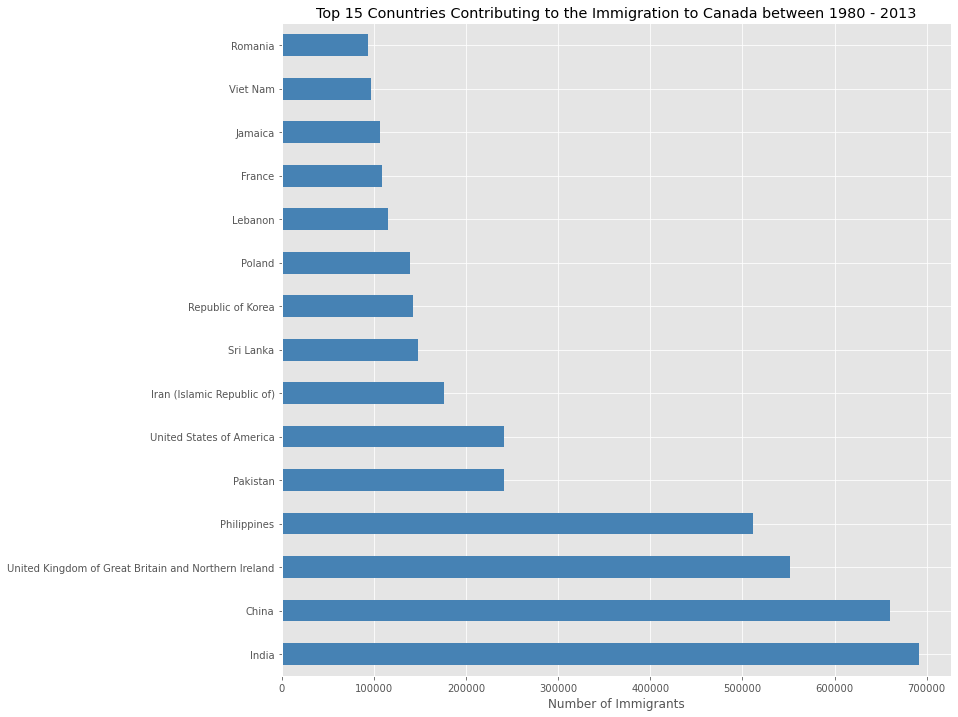

In [85]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

In [86]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.0


<function matplotlib.pyplot.show(*args, **kw)>

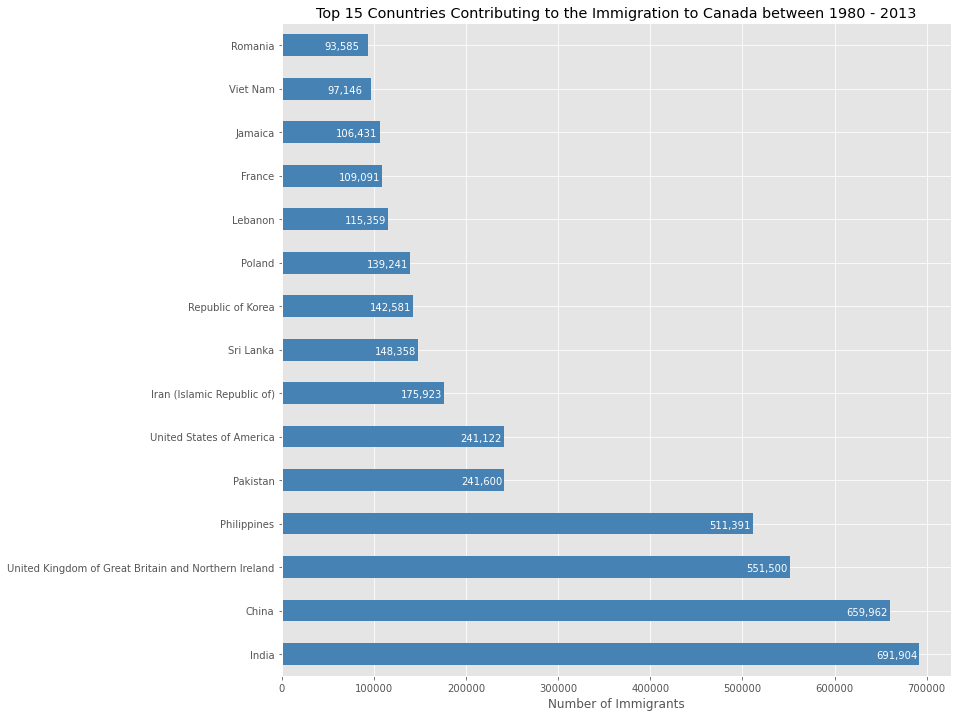

In [88]:
# annotate value labels to each country
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show

# PieChart

In [89]:
df_canada

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [94]:
df_continents = df_canada.groupby('Continent', axis = 0).sum()
# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_canada.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


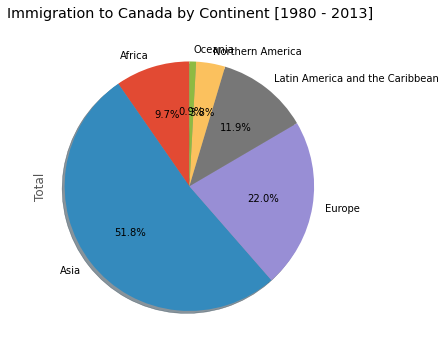

In [95]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

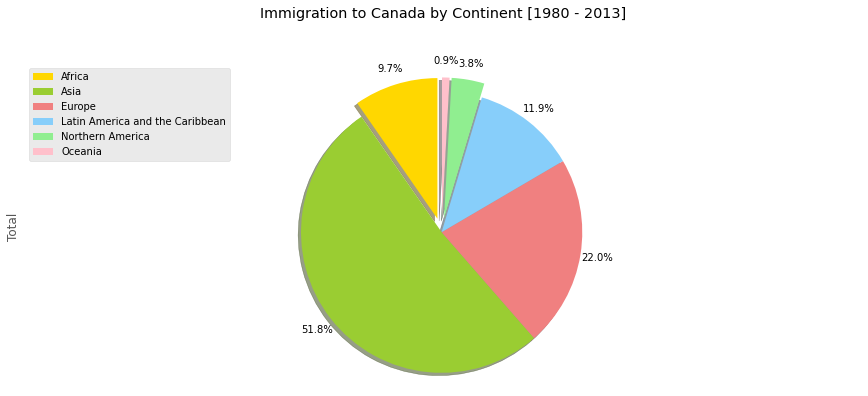

In [98]:
# Quite unclear, basic version: 

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()


# Box Plot

In [4]:
years = list(map(str, range(1980,2014)))
df_japan = df_canada.loc[['Japan'], years].transpose()
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


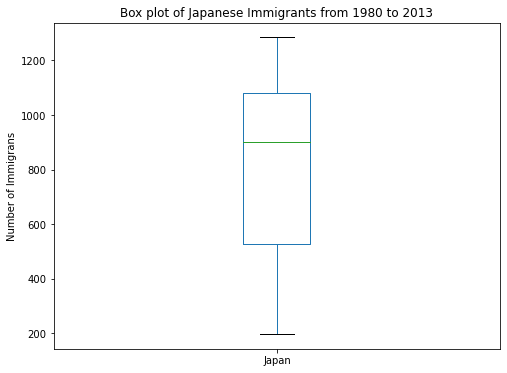

             Japan
count    34.000000
mean    814.911765
std     337.219771
min     198.000000
25%     529.000000
50%     902.000000
75%    1079.000000
max    1284.000000


In [5]:
import matplotlib.pyplot as plt

df_japan.plot.box(figsize = (8,6))

plt.title('Box plot of Japanese Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrans')

plt.show()
print(df_japan.describe())

In [6]:
df_CI = df_canada.loc[['China', 'India'], years].transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


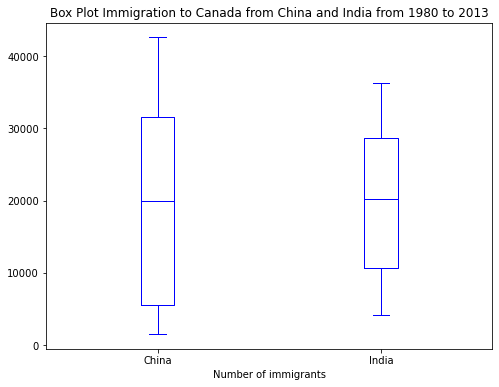

              China         India
count     34.000000     34.000000
mean   19410.647059  20350.117647
std    13568.230790  10007.342579
min     1527.000000   4211.000000
25%     5512.750000  10637.750000
50%    19945.000000  20235.000000
75%    31568.500000  28699.500000
max    42584.000000  36210.000000


In [8]:
df_CI.plot(kind = 'box', figsize = (8,6), color = 'Blue') #, vert = False) # if you need it horizonatal

plt.title('Box Plot Immigration to Canada from China and India from 1980 to 2013')
plt.xlabel('Number of immigrants')

plt.show()
print(df_CI.describe())

## Visualise multiple plots together with a figure (overall canvas) and divide it into subplots

fig = plt.figure()

ax = fig.add_subplot(nrows, ncols, plot_number)

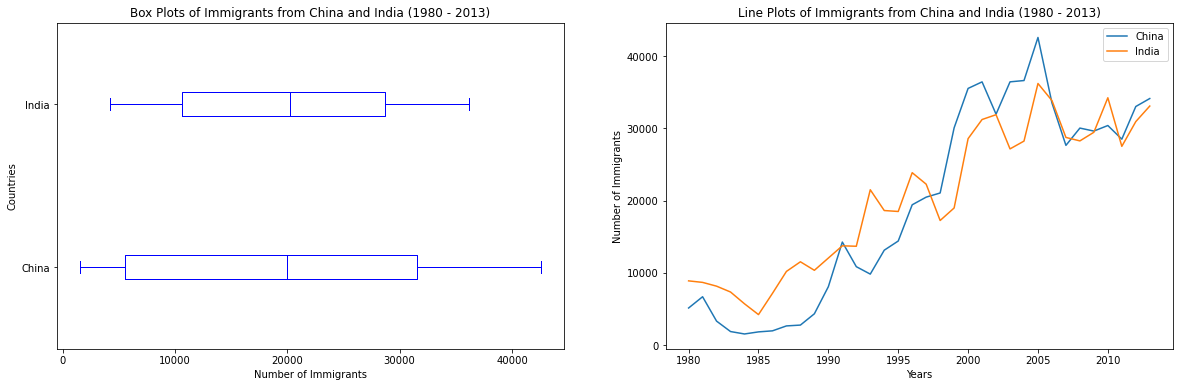

In [18]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

# Scatter Plots

In [27]:
# Create sum of tot immigration per year
df_tot = pd.DataFrame(df_canada[years]).sum(axis = 0)

# Convert years in integers
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot = df_tot.reset_index()
df_tot.columns = ['year', 'total']
df_tot.head()



,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


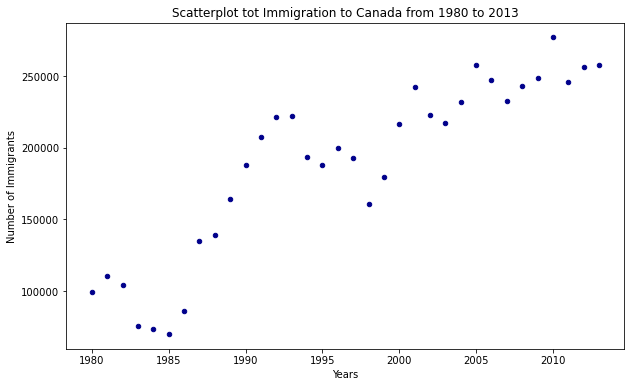

In [28]:
df_tot.plot(kind = 'scatter', x = 'year', y= 'total', figsize = (10,6), color = 'darkblue')

plt.title('Scatterplot tot Immigration to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

In [30]:
# Regression line: 

x = df_tot ['year']
y = df_tot ['total']
fit = np.polyfit(x,y, deg = 1)

print (fit) # intercept and slope

[ 5.56709228e+03 -1.09261952e+07]


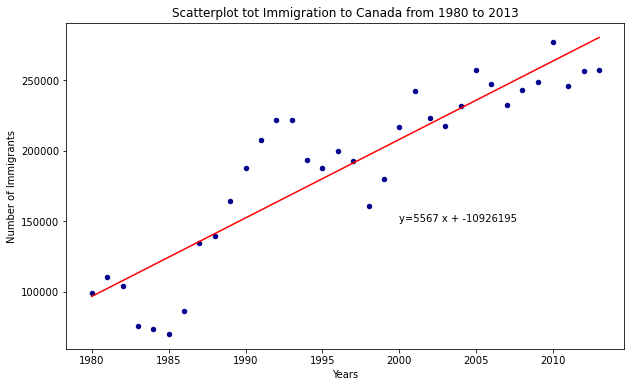

In [32]:
df_tot.plot(kind = 'scatter', x = 'year', y= 'total', figsize = (10,6), color = 'darkblue')

plt.title('Scatterplot tot Immigration to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

# let's add the fitting line
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

In [38]:
# Bubble Plots: 

df_canada_t = df_canada[years].transpose()
df_canada_t.index = map(int, df_canada_t.index)
df_canada_t.index.name = 'Year'
df_canada_t.reset_index(inplace = True)
df_canada_t.head()

,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [47]:
# Normalised Brazil  and Argentina data: 

norm_braz = ((df_canada_t['Brazil'] - df_canada_t['Brazil'].mean())/ df_canada_t['Brazil'].std())

norm_arg = ((df_canada_t['Argentina'] - df_canada_t['Argentina'].mean())/ df_canada_t['Argentina'].std())

To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the ax parameter.

We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:

    multiply weights by 2000 to scale it up on the graph, and,
    add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).


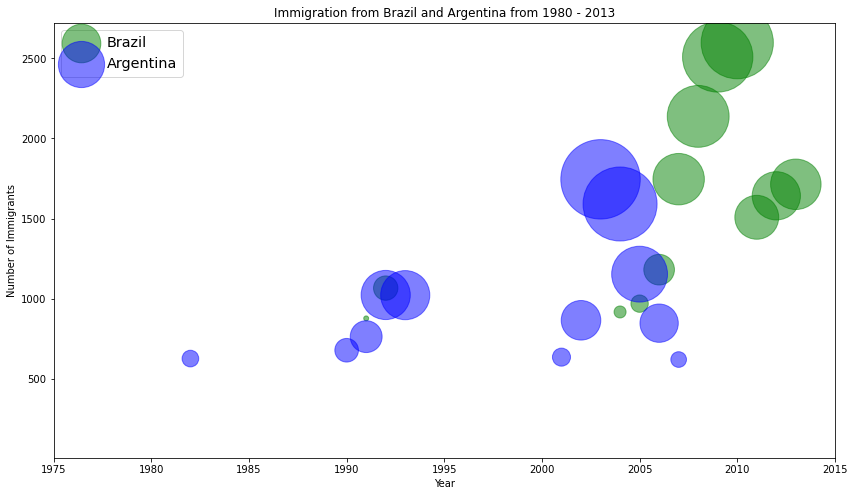

In [53]:
# Brazil
ax0 = df_canada_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_braz * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_canada_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_arg * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.